In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
movies = pd.read_csv("movies.csv")

In [7]:
tags=pd.read_csv("tags.csv")

In [9]:
ratings=pd.read_csv("ratings.csv")

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# add columns name
movies.columns=["movie_Id","moviename","category"]
movies.dropna(inplace=True)
movies.head()

,movie_Id,moviename,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.columns=["Id","movie_Id","Ratings","Time_stamp"]
ratings.dropna(inplace=True)
ratings.head()

,Id,movie_Id,Ratings,Time_stamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [17]:
df=pd.concat([movies,ratings,tags],axis=1)
df.head()

,movie_Id,moviename,category,Id,movie_Id,Ratings,Time_stamp,userId,movieId,tag,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,17,4.0,944249077,22.0,26479.0,Kevin Kline,1.583039e+09
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,25,1.0,944250228,22.0,79592.0,misogyny,1.581476e+09
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,29,2.0,943230976,22.0,247150.0,acrophobia,1.622483e+09
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,30,5.0,944249077,34.0,2174.0,music,1.249808e+09
4,5.0,Father of the Bride Part II (1995),Comedy,1,32,5.0,943228858,34.0,2174.0,weird,1.249808e+09


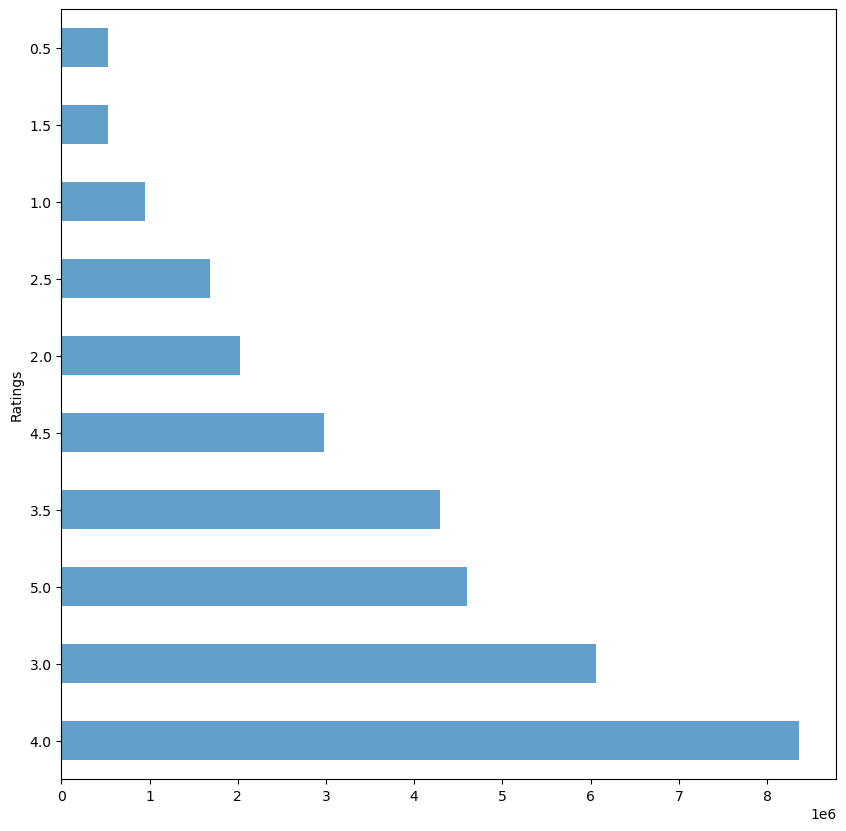

In [18]:
df["Ratings"].value_counts().plot(kind="barh",alpha=0.7,figsize=(10,10))
plt.show()                                  

Text(0.5, 0, 'Ratings')

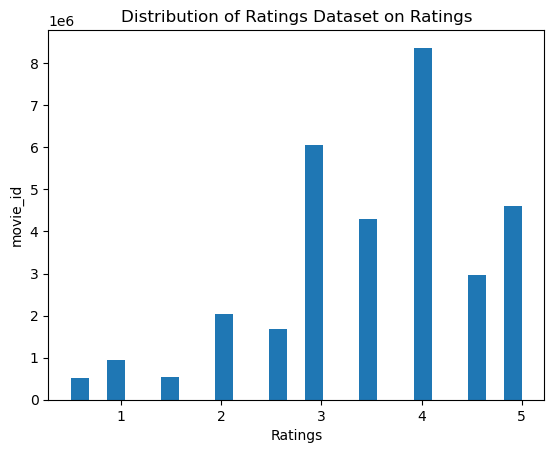

In [21]:
df.Ratings.plot.hist(bins=25)
plt.title("Distribution of Ratings Dataset on Ratings")
plt.ylabel("movie_id")
plt.xlabel("Ratings")

In [23]:
groupedby_moviename=df.groupby("moviename")
groupedby_Ratings=df.groupby("Ratings")
groupedby_userId=df.groupby("userId")

In [25]:
mov=df.groupby("moviename").size().sort_values(ascending=True)[:1000]
print(mov)

moviename
 (2019)                                   1
Rudy Habibie (2016)                       1
Rudy (1993)                               1
Rudraksh (2004)                           1
Rudolph, the Red-Nosed Reindeer (1964)    1
                                         ..
Riot in Cell Block 11 (1954)              1
Riot On! (2004)                           1
Ripples (1967)                            1
Riptide (1934)                            1
Riptide (1949)                            1
Length: 1000, dtype: int64


In [27]:
picture = groupedby_moviename.get_group('Rudy (1993)')
picture.shape

(1, 11)

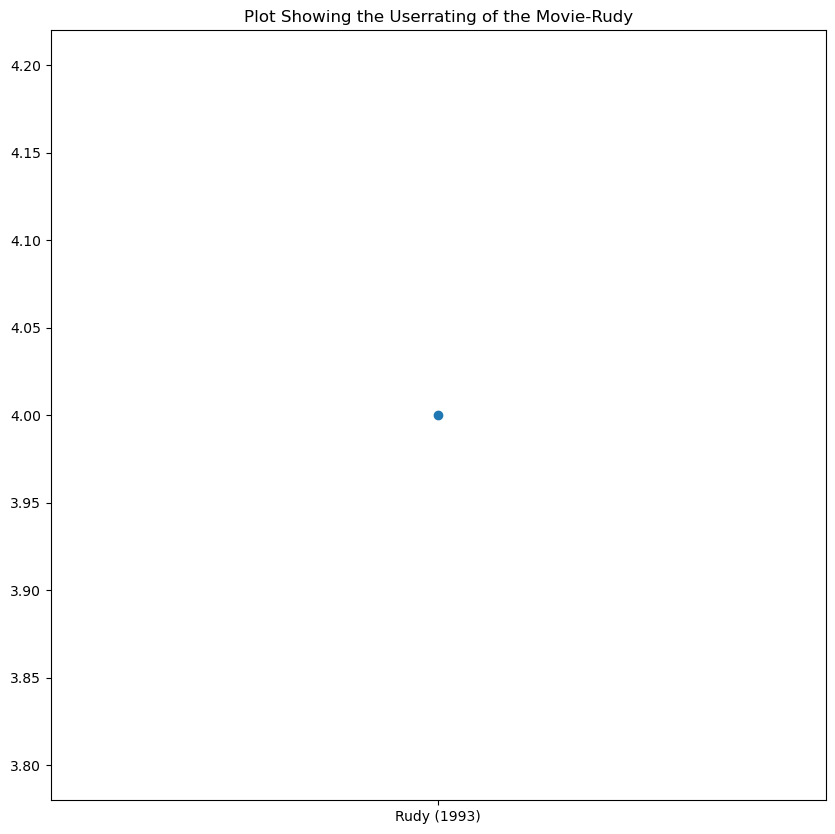

In [29]:
#find and visiualize the userrating of the movie(Rudy)
plt.figure(figsize=(10,10))
plt.scatter(picture["moviename"],picture['Ratings'])
plt.title("Plot Showing the Userrating of the Movie-Rudy")
plt.show()

In [11]:
moviename="Rudy (1993)"
result=df[df["moviename"].str.contains(moviename,case=False,na=False,regex=True)]
print(result)

NameError: name 'df' is not defined

In [33]:
movies.head(30)

,movie_Id,moviename,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [39]:
# visualize the rating data by tags of userId=22.0
userId_22=groupedby_userId.get_group(22)
userId_22[["userId","Ratings"]]

,userId,Ratings
0,22.0,4.0
1,22.0,1.0
2,22.0,2.0


perform machine learning on first 500 extracted records

In [41]:
first_500=df[500:]
first_500.dropna(inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15116\1061955935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [45]:
features=first_500[['movie_Id','userId','moviename']].values

In [47]:
labels=first_500[["Ratings"]].values

In [51]:
# build train and test dataset 
train,test,train_labels,test_labels=train_test_split(features,labels,test_size=0.33,random_state=42)

perform the following

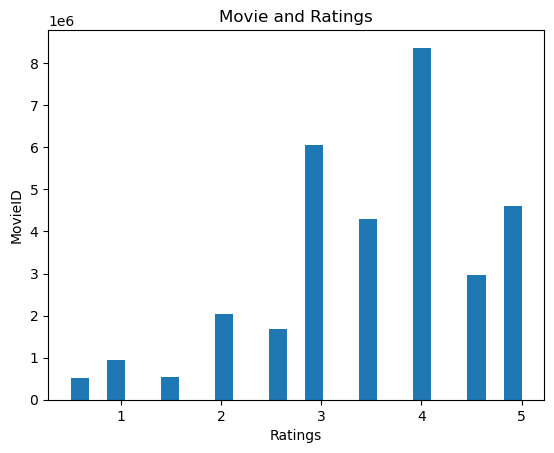

In [55]:
# make a histogram for movie
df.Ratings.plot.hist(bins=25)
plt.title("Movie and Ratings")
plt.ylabel("MovieID")
plt.xlabel("Ratings")
plt.show()